# Series de tiempo estacionarias
Tomando como referencia el segundo capítulo de la cuarta edición del libro de Enders, *Applied Econometric Time Series*, se hará un resumen de los principales modelos para series de tiempo estacionarias y la metodología Box-Jenkins.


## Librerías

* **Pandas**: Manejo de *dataframes*.
* **Numpy**: Manejo de varias funciones y estructuras matemáticas
* **Matplotlib**: Gráficas.
* **Statsmodels**: Herramientas para análisis de las series de tiempo.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels

from ipywidgets import interact, FloatSlider

## Teoría

Las variables a utilizar son **discretas** y aleatorias. En particular, se trabajarán con secuencias aleatorias indexadas por $t$ (período $t$-ésimo). El concepto matemático detrás de toda la teoría es el de las *ecuaciones en diferencias estocásticas*.

Es fundamental introducir la noción de proceso de **ruido blanco**. Se dice que una secuencia $\{\varepsilon_t\}$ es un proceso de **ruido blanco** si cada elemento en la secuencia tiene una media de cero, una varianza constante y no tiene correlación con otros elementos de la secuencia. Formalmente, para todo periodo $t$:

$$\begin{align*}

E(\varepsilon_t) &= E(\varepsilon_{t-1}) =  \cdots = 0\\
V(\varepsilon_t^2) &= V(\varepsilon_{t-1}^2) =  \cdots = \sigma^2\\
\text{Cov}(\varepsilon_t,\varepsilon_{t-s})&= \text{Cov}(\varepsilon_{t-j},\varepsilon_{t-s-j}) = 0 \quad \forall j,s

\end{align*}$$

Una secuencia es llamada **autoregresiva de orden $p$**, simbolizado como $\text{AR}(p)$, si tiene la siguiente forma:

$$y_t = a_0 + \sum_{i = 1}^p {a_iy_{t-i}} + \varepsilon_t$$

Por otro lado, una secuencia es llamada **media movil de orden $q$**, $\text{MA}(q)$, si tiene la siguiente forma:

$$x_t =  \sum_{i = 0}^q {\beta_i\varepsilon_{t-i}}$$

### Modelos ARMA
Es posible combinar una ecuación en diferencias lineal de orden $p$ con un proceso de media móvil para obtener un modelo autorregresivo de media móvil (modelo $\text{ARMA}$). Así, $y_t$ tendrá un modelo $\text{ARMA}$ si:

$$y_t = a_0 + \sum_{i = 1}^p {a_iy_{t-i}} + \sum_{i = 0}^q {\beta_i\varepsilon_{t-i}}$$

En estos modelos, es válido dejar que $p$ y/o $q$ sean infinito.

Es necesario tener en cuenta que, durante el desarrollo de toda esta teoría, se asume que las **raíces características del la ecuación en diferencias están dentro del círculo unitario**. Caso contrario, se dice que la secuencia está **integrada** y, entonces, se estaría hablando de un modelo **autorregresivo integrado de media móvil** $(\text{ARIMA})$.

Solucionar un modelo $\text{ARMA}$ significa expresar $y_t$ en términos de la secuencia $\{\varepsilon_t\}$, como si se tratara de una ecuación lineal en diferencias estocásticas. Utilizando los [operadores de rezago](https://en.wikipedia.org/wiki/Lag_operator) para reescribir el modelo $\text{ARMA}$ general:

$$\left(1 - \sum_{i=1}^p a_iL^i\right)y_t = a_0 + \sum_{i=0}^q \beta_i\varepsilon_{t-i}$$

Podemos hallar la solución *particular* (ya que la solución *complementaria* consiste en la combinación lineal de las raíces del polinomio característico elevado a la $t$):

$$y_t^p = \dfrac{a_0 + \sum_{i=0}^q \beta_i\varepsilon_{t-i}}{\left(1 - \sum_{i=1}^p a_iL^i\right)}$$

Lo importante no es expandir la solución. Más bien, es necesario darse cuenta de que **expandir este resultado resultará en un proceso $\text{MA}(\infty)$**. El problema radica en **establecer si la expansión es convergente**.

**Resultados importantes de la próxima sección**
1. Condición de estabilidad: las raíces del polinomio $\left(1 - \sum_{i=1}^p a_iL^i\right)$ deben caer fuera del círculo unitario.

2. Si $y_t$ es una ecuación lineal en diferencias estocástica, la condición de estabilidad es una *condición necesaria* para la estacionariedad de la serie de tiempo $\{y_t\}$.

### Estacionariedad
Normalmente, no es posible conseguir un *ensemble* (varias series de tiempo del mismo proceso en el mismo periodo). Lo que normalmente se tiene es solo una realización de una serien en particular. Afortunadamente, si $\{y_t\}$ es una serie **estacionaria**, ocurre algo maravilloso: ¡la media, varianza y las autocorrelaciones pueden ser aproximadas por series *suficientemente largas* basadas en **una sola realización** de dicha serie!

Entonces decir, si sabemos que un proceso es estacionario, en vez de tratar de conseguir ocho realizaciones de una misma serie (es decir, ¡ocho series de un mismo proceso!), podemos utilizar la única realización que probablemente podamos conseguir (porque quizá es imposible ver ocho posibles valores del PBI para el año 2020 de la economía peruana) para aproximar el promedio:

$$E(y_t) \approx \frac{1}{8}\sum_{t=1}^8y_t$$

Esta aproximación asume que el proceso estocástico es *débilmente estacionario*.

Formalmente, un proceso es débilmente estacionario si, para todo $t$, $s$ y $j$ posibles:

$$\begin{align*}

E(y_t) &= E(y_{t-s}) =  \mu\\
V(y_t) &= V(t_{t-s}) =  \sigma_y^2\\
\text{Cov}(y_t,y_{t-s})&= \text{Cov}(y_{t-j},y_{t-s-j}) = \gamma_s

\end{align*}$$

En otras palabras, los dos primeros momentos poblacionales deben ser independientes del origen del tiempo.

Al ver que en $s=0$ la autocovarianza es realmente la varianza del proceso, se define la *autocorrelación* entre $y_t$ y $y_{t-s}$ de la siguiente manera:

$$\rho_s \equiv \frac{\gamma_s}{\gamma_0} $$

Como $\gamma_s$ y $\gamma_0$ son independientes del tiempo, los coeficientes $\rho_s$ también son independientes del tiempo.

#### Restricción de estacionariedad para un proceso $\text{AR}(1)$ 

Se analizarán las condiciones necesarias y suficientes para la estacionariedad de un proceso $\text{AR}(1)$.

$$y_t = a_0 + a_1y_{t-1} + \varepsilon_t$$

En el capítulo anterior, se demostró que la solución a esta ecuación es:

$$y_t = a_0\sum_{i=0}^{t-1}a_1^i + a_1^ty_0+\sum_{i=0}^{t-1}a_1^i\varepsilon_{t-i}$$

Tomando el valor esperado de la ecuación anterior

$$E(y_t) = a_0\sum_{i=0}^{t-1}a_1^i + a_1^ty_0$$

Adelantando $s$ periodos:

$$E(y_{t+s}) = a_0\sum_{i=0}^{t+s-1}a_1^i + a_1^{t+s}y_0$$

Claramente, $y_t$ y $y_{t-s}$ no son independientes del orígen del tiempo, lo que implica que esta serie no es débilmente estacionaria. Sin embargo, ¿que pasaría si $t$ fuera *muy* grande y si $\vert a_1 \vert < 1$? Con ambas condiciones, podemos observar que es posible dejar que $t\to\infty$ y que la serie converja (es fácil ver que esta serie es, de hecho, una progresión geométrica). Así, cuando $t\to\infty$ y $\vert a_1 \vert < 1$

$$\lim_{t\to \infty}y_t = \frac{a_0}{1-a_1} + \sum_{i=0}^{\infty}a_1^i\varepsilon_{t-i}$$

Verificando los momentos poblacionales de esta serie límite para todo $t$:

* **Esperanza**

$$E(y_t) = \frac{a_0}{1-a_1}$$

* **Varianza**

$$V(y_t) = E\left(\sum_{i=0}^{\infty}a_1^i\varepsilon_{t-i}\right) = E\left(\sum_{i=0}^{\infty}({a_1}^2)^i\varepsilon_{t-i}^2 + \sum_{i<j}^{\infty}{a_1}^{i+j}\varepsilon_{t-i}\varepsilon_{t-j}\right) = \sum_{i=0}^{\infty}({a_1}^2)^iE\left(\varepsilon_{t-i}^2\right) = \frac{\sigma^2}{1-a_1^2}$$

* **Covarianzas**

$$\text{Cov}(y_t,y_{t-s}) 
= E\left(\sum_{i=0}^{\infty}a_1^i\varepsilon_{t-i}\sum_{j=0}^{\infty}a_1^j\varepsilon_{t-s-j}\right) 
= E\left(\sum_{i=0}^{\infty}\sum_{j=0}^{\infty}{a_1}^{i+j}\varepsilon_{t-i}\varepsilon_{t-s-j} \right)
= E\left(\sum_{i=s}^{\infty}\sum_{j=0}^{\infty}{a_1}^{i+j}\varepsilon_{t-i}\varepsilon_{t-s-j} \right)\\
= E\left(\sum_{j=0}^{\infty}{a_1}^{s+2j}\varepsilon_{t-s-j}^2 \right)
= a_1^s\sum_{j=0}^{\infty}{a_1}^{2j}E\left(\varepsilon_{t-s-j}^2\right) = a_1^s\frac{\sigma^2}{1-a_1^2}$$

Como se puede observar, **la secuencia límite es débilmente estacionaria**. Por eso se puede realizar la aproximación mencionada anteriormente si es que se tiene una cantidad de observaciones $t$ suficientemente grande.

Por eso, si un proceso recién ha empezado, el proceso no sería estacionario (por eso se asume que el proceso de generación de datos empezó "infinitamente antes").

Si no hay condiciones iniciales, los resultados no cambian casi nada. Sin el valor de $y_0$

$$y_t = \frac{a_0}{1-a_1} + \sum_{i=0}^\infty a_1^i\varepsilon_{t-i} + Aa_1^t$$

Al tomar expectativas, se ve que la secuencia no puede ser estacionaria salvo que $Aa_1^t$ sea igual a zero. Para esto, el proceso ha debido de empezar infinitamente atrás o $A=0$, pero $A$ puede ser interpretada como una desviación del equilibrio de largo plazo. Así, las condiciones de estabilidad son las siguientes:

1. La solución homogénea debe ser zero.

2. El módulo de la raíz característica $a_1$ debe ser menor a uno. 

Esta lógica se puede generalizar para un modelo $\text{ARMA}(p,q)$ general. La solución homogénea de este proceso tiene la siguiente forma:

$$\sum_{i=1}^p A_i\alpha_i^t$$

Si cualquier parte de la ecuación homogénea está presente, los momentos poblacionales serán dependientes del tiempo. Entonces:

**Para cualquier modelo $\text{ARMA}(p,q)$, la estacionariedad necesita que la solución homogénea sea igual a cero.**

### Restricciones de estacionariedad para un modelo $\text{ARMA}(p,q)$

**Si las raíces de la ecuación característica del modelo $\text{ARMA}(p,q)$ caen dentro del círculo unitario y si la secuencia $\{x_t\}$ es estacionaria, entonces, la secuencia $\{y_t\}$ será estacionaria.**

#### Restricción para un modelo $\text{ARMA}(2,1)$

Iniciemos considerando las restricciones para que un modelo $\text{ARMA}(2,1)$ sea estacionario. Se ignorará el intercepto, pues no afecta a la estacionariedad. Así:
$$y_t = a_1y_{t-1}+a_2y_{t-2}+\varepsilon_t+\beta_1\varepsilon_{t-1}$$
De la sección anterior, sabemos que la solución homogénea debe ser cero. Entonces, será necesario encontrar una solución particular. Si utilizamos el método de los [coeficientes indeterminados](https://tutorial.math.lamar.edu/classes/de/undeterminedcoefficients.aspx), nuestra solución de prueba sería
$$y_t = \sum_{i=0}^\infty c_i\varepsilon_{t-i}$$
Entonces:
$$\begin{align*}
\sum_{i=0}^\infty c_i\varepsilon_{t-i} &= a_1\sum_{i=0}^\infty c_i\varepsilon_{t-1-i} + a_2\sum_{i=0}^\infty c_i\varepsilon_{t-2-i} + \varepsilon_t + \beta_1\varepsilon_{t-1}\\
c_0\varepsilon_t + c_1\varepsilon_{t-1}\sum_{i=2}^\infty c_i\varepsilon_{t-i} &= \varepsilon_t + (a_1c_0 + \beta_1)\varepsilon_{t-1} + \sum_{i=2}^\infty \left( a_1c_{i-1}+a_2c_{i-2}\right)\varepsilon_{t-i}
\end{align*}$$
Si igualamos los coeficientes, podemos ver que seguirán la siguiente ecuación, con $c_0 = 1$ y $c_1 = a_1c_0 + \beta_1$:

$$c_i = a_1c_{i-1} + a_2c_{i-2} \ \ \forall i \geq 2$$

El punto clave es darse cuenta de que la ecuación en diferencias que sigue $c_i$ es la misma del proceso $\text{ARMA}(2,1)$ original. Así, la secuencia $\{c_i\}$ es convergente.

¿Qué implica esto? Tomando el valor esperado de la solución $y_t$, podemos ver fácilmente que $E(y_t) =E(y_{t-s})=0$. La media es, entonces, finita y no depende del tiempo. Para la varianza,
$$V(y_t)= E\left(\sum_{i=0}^\infty c_i\varepsilon_{t-i}\right)^2=\sum_{i=0}^\infty c_i^2E\left(\varepsilon_{t-i}\right) = \sigma^2\sum_{i=0}^\infty c_i^2$$
De acá, se desprende que $V(y_t)=V(y_{t-s})$. Finalmente, para las covarianzas,
$$\begin{align*}
\text{Cov}(y_t,y_{t-1}) &= E\left(\sum_{i=0}^\infty c_i\varepsilon_{t-i}\sum_{j=0}^\infty c_j\varepsilon_{t-1-i}\right) = E\left(\sum_{i=1}^\infty c_ic_{i-1}\varepsilon_{t-i}^2\right) = \sigma^2\sum_{i=1}^\infty c_ic_{i-1}\\
\text{Cov}(y_t,y_{t-2}) &= E\left(\sum_{i=0}^\infty c_i\varepsilon_{t-i}\sum_{j=0}^\infty c_j\varepsilon_{t-2-i}\right) = E\left(\sum_{i=2}^\infty c_ic_{i-2}\varepsilon_{t-i}^2\right) = \sigma^2\sum_{i=1}^\infty c_ic_{i-2}\\
\end{align*}$$
$$\vdots$$
$$\text{Cov}(y_t,y_{t-s}) = E\left(\sum_{i=0}^\infty c_i\varepsilon_{t-i}\sum_{j=0}^\infty c_j\varepsilon_{t-s-i}\right) = E\left(\sum_{i=s}^\infty c_ic_{i-s}\varepsilon_{t-i}^2\right) = \sigma^2\sum_{i=s}^\infty c_ic_{i-s}$$
Así, la covarianza tampoco depende del tiempo. Todo esto se desprende del hecho de que la secuencia $\{c_i\}$ es convergente.

#### Generalización a procesos $\text{ARMA}(p,q)$ generales

##### Restricciones para procesos $\text{MA}$
Las condiciones necesarias y suficientes para que un proceso $\text{MA}(\infty)$ sea débilmente estacionario es que:

* La expresión $\sum \beta_i^2$ sea finita.
* La expresión $\sum \beta_i\beta_{i-s}$ sea finita.

De esta manera, ya podemos ver cómo se podría generalizar este resultado a todos los modelos $\text{ARMA}(p,q)$. Primero, consideremos las condiciones que aseguran la estacionariedad de un proceso $\text{MA}(\infty)$ (ya que este caso también abarca los procesos de media movil con orden finito).
$$x_t = \sum_{i=0}^{\infty}\beta_i\varepsilon_{t-i}$$
A pesar de que la secuencia $\{\varepsilon_t\}$ es un proceso de ruido blanco, $\{x_t\}$ no lo es (debido a covarianzas distinta de cero). *Ahora, lo importante es determinar si es débilmente estacionario*.

1. ¿Es la media finita e independiente del tiempo? 

$$E(x_t) = E\left(\sum_{i=0}^{\infty}\beta_i\varepsilon_{t-i}\right) = \sum_{i=0}^{\infty}\beta_iE\left(\varepsilon_{t-i}\right) = 0$$

$$E(x_{t-s}) = E\left(\sum_{i=0}^{\infty}\beta_i\varepsilon_{t-s-i}\right) = \sum_{i=0}^{\infty}\beta_iE\left(\varepsilon_{t-s-i}\right) = 0$$

Rpta: **Sí**.

2. ¿Es la varianza finita e independiente del tiempo?

$$V(x_t) = E\left(\sum_{i=0}^{\infty}\beta_i\varepsilon_{t-i}\right)^2 = \sum_{i=0}^{\infty}\beta_i^2E\left(\varepsilon_{t-i}^2\right) = \sigma^2\sum_{i=0}^{\infty}\beta_i^2$$

$$V(x_{t-s}) = E\left(\sum_{i=0}^{\infty}\beta_i\varepsilon_{t-s-i}\right)^2 = \sum_{i=0}^{\infty}\beta_i^2E\left(\varepsilon_{t-s-i}^2\right) = \sigma^2\sum_{i=0}^{\infty}\beta_i^2$$

Rpta: **Sí**. No olvidar que al ser $\varepsilon_t$ un ruido blanco, sus covarianzas son iguales a cero.

3. ¿Son todas las autocovarianzas finitas e independientes del tiempo?

$$\text{Cov}(x_t,x_{t-s}) = E\left(\sum_{i=0}^{\infty}\beta_i\varepsilon_{t-i}\sum_{j=0}^{\infty}\beta_j\varepsilon_{t-s-j}\right) = \sum_{i=s}^{\infty}\beta_i\beta_{i-s}E\left(\varepsilon_{t-i}^2\right) = \sigma^2\sum_{i=s}^{\infty}\beta_i\beta_{i-s}$$

Rpta: **Sí**.

**En resumen**
Las condiciones necesarias y suficientes para que un proceso $\text{MA}(\infty)$ sea débilmente estacionario es que:

* La expresión $\sum \beta_i^2$ sea finita.
* La expresión $\sum \beta_i\beta_{i-s}$ sea finita.

#### Restricciones para procesos $\text{AR}$
**Las raíces del polinomio característico deben tener módulo inferior a uno.**

Considerando un modelo puramente autorregresivo

$$y_t = a_0 + \sum_{i=1}^{p}a_iy_{t-i} + \varepsilon_t$$

Si todas las raíces características caen dentro del círculo unitario, la solución particular puede ser escrita como

$$y_t = \frac{a_0}{1-\sum_{i=1}^pa_i} + \sum_{i=0}^{\infty}c_i\varepsilon_{t-i}$$

Ya sabemos que $c_i$ (los coeficientes indeterminados) se comportarán según la ecuación característica de la parte autorregresiva del modelo. Así, $\{c_i\}$ es convergente. Aunque la solución particular es un proceso $\text{MA}(\infty)$, ¡la convergencia de los coeficientes implica que la suma de los cuadrados es finito! Así, utilizando esta solución particular,

$$E(y_t) = E(y_{t-s})=\frac{a_0}{1-\sum a_i}$$

La media es finita e independiente del tiempo. Ahora, para la varianza:

$$V(y_t) = E\left(\sum_{i=0}^{\infty}c_i\varepsilon_{t-i}\right)^2 = \sigma^2\sum_{i=0}^{\infty}c_i^2$$

$$V(y_{t-s}) = E\left(\sum_{i=0}^{\infty}c_i\varepsilon_{t-s-i}\right)^2 = \sigma^2\sum_{i=0}^{\infty}c_i^2$$
También se observa que es finita (pues $\sum c_i^2$ es finita, ya que $\{c_i\}$ es convergente porque las raíces características están dentro del círculo unitario) e independiente del tiempo.

Finalmente, para las covarianzas:
$$\text{Cov}(y_t,y_{t-s}) = E\left(\sum_{i=0}^{\infty}c_i\varepsilon_{t-i}\sum_{j=0}^{\infty}c_j\varepsilon_{t-s-j}\right) = \sigma^2\sum_{i=s}^{\infty}c_ic_{i-s}$$
Así, estas también son finitas e independientes del tiempo para todo $t$ y $t-s$.


#### Restricción para el modelo $\text{ARMA}$

Una vez entendido todo esto, el siguiente paso, combinar el modelo $\text{AR}$ con el modelo $\text{MA}$, es trivial. De hecho, no hay casi ningún cambio respecto al análisis que se realizó antes.
$$\begin{align*}
y_t &= a_0 + \sum_{i=1}^p a_iy_{t-i} + x_t\\
x_t &= \sum_{i=0}^q \beta_i\varepsilon_{t-i}
\end{align*}$$

**Si las raíces de la ecuación característica del modelo $\text{ARMA}(p,q)$ caen dentro del círculo unitario y si la secuencia $\{x_t\}$ es estacionaria, entonces, la secuencia $\{y_t\}$ será estacionaria.**

Basta considerar la solución particular del modelo:

$$y_t = \frac{a_0}{1-\sum_{i=1}^pa_i} + \frac{\varepsilon_t}{1-\sum_{i=1}^pa_iL^i} + \frac{\beta_1\varepsilon_{t-1}}{1-\sum_{i=1}^pa_iL^i}+\frac{\beta_2\varepsilon_{t-2}}{1-\sum_{i=1}^pa_iL^i}+\cdots$$

Como $\{x_t\}$ es estacionario, solo es necesario ver la parte autorregresiva del modelo. Pero esta parte será estacionaria si se cumple que las raíces de $1-\sum_{i=1}^pa_i$ caen todas *fuera* del círculo unitario.

Nota: recordar que, en cierto sentido, si $\lambda$ es una raíz de la ecuación característica, entonces $\frac{1}{\lambda}$ es la raíz del polinomio de rezago.

### La función de autocorrelación
Herramienta importante para la elección del modelo adecuado según la metodología de Box-Jenkins

#### Proceso $\text{AR}(1)$

Como se ha observado, las primeras autocovarianzas del proceso $\text{AR}(1)$ son las siguientes:
$$\begin{align*}
\gamma_0 &= \frac{\sigma^2}{1-a_1^2}\\
\gamma_s &= \frac{\sigma^2a_1^s}{1-a_1^2}\\
\therefore \rho_s &= a_1^s
\end{align*}$$
Se puede observar que la autocorrelación $\rho_s$ exhibe un comportamiento de decaimiento exponencial. Esto es importante, pues **esta es una característica representativa de un proceso $\text{AR}(1)$**.
Para visualizar mejor este comportamiento, se realiza un **correlograma**, que simplemente es un *plot* de $\rho_s$ con $s$.

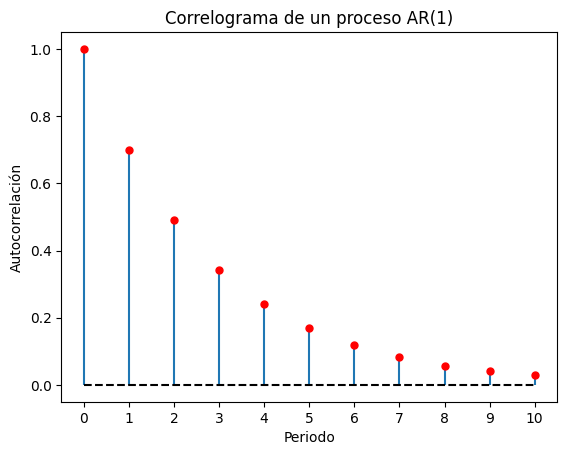

In [8]:
# Ejemplo: Un proceso autoregresivo de primer órden con a1 = 0.7
plt.vlines(range(0,11), ymin = 0, ymax = [0.7 ** s for s in range(0,11)])
plt.hlines(xmin=0, xmax= 10, y  = 0, colors = "black", linestyles= "dashed")
plt.plot(range(0,11), [0.7 ** i for i in range(0,11)], "o", markersize = 5, color = "red")
plt.xticks(range(0,11))
plt.title("Correlograma de un proceso AR(1)")
plt.xlabel("Periodo")
plt.ylabel("Autocorrelación")
plt.show()

#### Proceso $\text{AR}(2)$
Una técnica alternativa para hallar los coeficientes de autocorrelación es utilizar las ecuaciones de **Yule-Walker**. Asumiremos un proceso estable y autorregresivo de orden dos sin intercepto, pues no afecta la autocorrelación.

$$y_t = a_1y_{t-1} + a_2y_{t-2}+\varepsilon_t$$

Estas ecuaciones consisten en empezar con el modelo inicial y multiplicar ambos lados por $y_t, y_{t-1},\ldots,y_{t-s}$ para después poder tomar la esperanza .

$$\begin{align*}
E(y_ty_t) &= a_1E(y_{t-1}y_t) + a_2E(y_{t-2}y_t) + E(\varepsilon_ty_t)\\
E(y_ty_{t-1}) &= a_1E(y_{t-1}y_{t-1}) + a_2E(y_{t-2}y_{t-1}) + E(\varepsilon_ty_{t-1})\\
E(y_ty_{t-2}) &= a_1E(y_{t-1}y_{t-2}) + a_2E(y_{t-2}y_{t-2}) + E(\varepsilon_ty_{t-2})
\end{align*}$$
$$\vdots$$
$$E(y_ty_{t-s}) = a_1E(y_{t-1}y_{t-s}) + a_2E(y_{t-2}y_{t-s}) + E(\varepsilon_ty_{t-s})$$

Las autocovarianzas de una serie estacionaria cumplen $E(y_ty_{t-s})=E(y_{t-k}y_{t-k-s})=\gamma_s$. Se sabe también (por solo tener un rezago en los errores) que $E(\varepsilon_ty_{t})=\sigma^2$ y $E(\varepsilon_ty_{t-s})=0$. Así, las ecuaciones restantes que se obtienen son
$$\begin{align*}
\gamma_0 &= a_1\gamma_1 + a_2\gamma_2 +\sigma^2\\
\gamma_1 &= a_1\gamma_0 + a_2\gamma_1\\
\gamma_s &= a_1\gamma_{s-1} + a_2\gamma_{s-2} \ \ \forall s \geq 2
\end{align*}$$
Dividiendo por $\gamma_0$ se obtiene
$$\begin{align*}
\rho_1 &= a_1\rho_0 + a_2\rho_1\\
\rho_s &= a_1\rho_{s-1} + a_2\rho_{s-2} \ \ \forall s \geq 2
\end{align*}$$
Como se puede observar, ¡todas las $\rho_s$ se comportan según el polinomio característico del proceso $\text{AR}(2)$!

**Ejemplo para el proceso $y_t = 0.7y_{t-1} - 0.49y_{t-2} + \varepsilon_t$**

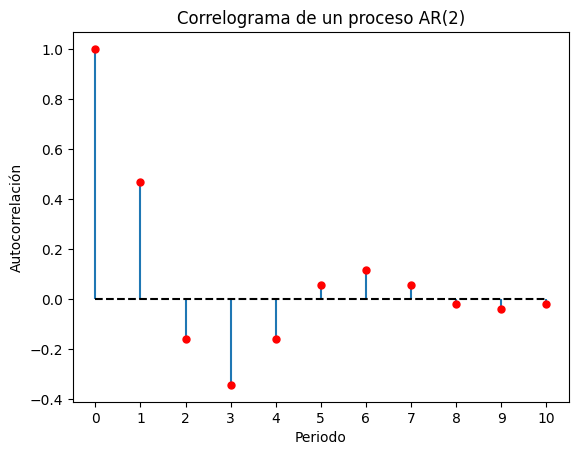

In [9]:
a1 = 0.7
a2 = -0.49
r = [1, a1/(1-a2)]
for i in range(2,11):
    r.append(a1*r[i-1]+a2*r[i-2])
plt.vlines(x = range(0,11) ,ymin = 0, ymax = r)
plt.plot(r, "o", markersize = 5, color = "red")
plt.hlines(xmin=0, xmax = 10, y = 0, colors= "black", linestyle = "dashed")
plt.xticks(range(0,11))
plt.title("Correlograma de un proceso AR(2)")
plt.xlabel("Periodo")
plt.ylabel("Autocorrelación")
plt.show()

#### Proceso $\text{MA}(1)$
Los procesos $\text{MA}(q)$ pueden identificarse muy fácilmente utilizando correlogramas, pues tienen un punto de corte después del período $q$.

Asumiendo un modelo $\text{MA}(1)$, se pueden hallar las ecuaciones de Yule-Walker como antes.
$$\begin{align*}
\gamma_0 &= E(y_ty_t) = E\left(\left(\varepsilon_{t} + \beta\varepsilon_{t-1}\right)\left(\varepsilon_{t} + \beta\varepsilon_{t-1}\right)\right) = (1+\beta^2)\sigma^2\\
\gamma_1 &= E(y_ty_{t-1}) = E\left(\left(\varepsilon_{t} + \beta\varepsilon_{t-1}\right)\left(\varepsilon_{t-1} + \beta\varepsilon_{t-2}\right)\right) = \beta\sigma^2\\
\gamma_s &= E(y_ty_{t-s}) = E\left(\left(\varepsilon_{t} + \beta\varepsilon_{t-1}\right)\left(\varepsilon_{t-s} + \beta\varepsilon_{t-s-1}\right)\right) = 0 \ \forall s \geq 2
\end{align*}$$
Es sencillo ver que las autocorrelaciones tienen un corte después del primer rezago. Realmente, las autocorrelaciones de un proceso $\text{MA}(q)$ tienen un corte después de $q$ rezagos.

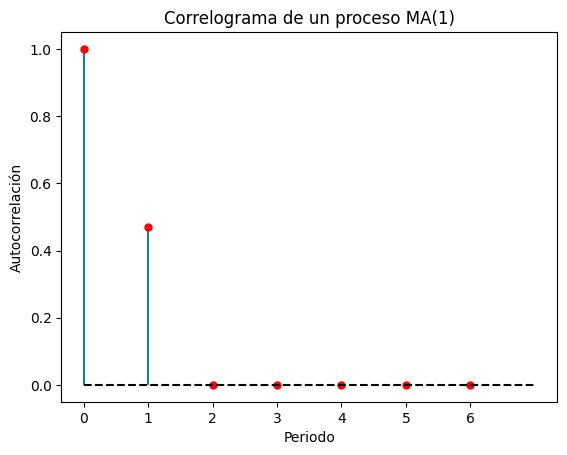

In [15]:

b1 = 0.7
r = [1, b1/(1+(b1**2))]
for i in range(2,7):
    r.append(0)
plt.vlines(x = range(0,7) ,ymin = 0, ymax = r)
plt.plot(r, "o", markersize = 5, color = "red")
plt.hlines(xmin=0, xmax = 7, y = 0, colors= "black", linestyle = "dashed")
plt.xticks(range(0,7))
plt.title("Correlograma de un proceso MA(1)")
plt.xlabel("Periodo")
plt.ylabel("Autocorrelación")
plt.show()

#### Proceso $\text{ARMA}(1,1)$
En general, para un proceso $\text{ARMA}(p,q)$, luego de $q$ rezagos (porque hacen falta $q$ rezagos para que la parte $\text{MA}(q)$ deje de fastidiar ya que sería cero), las autocorrelaciones se comportan como el polinomio característico indicaría.

Teniendo el modelo
$$y_t = a_1y_{t-1} + \varepsilon_t + \beta_1\varepsilon_{t-1}$$
Realizamos el mismo procedimiento de antes para obtener las ecuaciones Yule-Walker.
$$\begin{align*}
E(y_ty_t) = a_1E(y_{t-1}y_t) + E(\varepsilon_{t}y_t) + \beta_1E(\varepsilon_{t-1}y_t) &\implies \gamma_0 = a_1\gamma_1 + \sigma^2 + \beta_1(a_1+\beta_1)\sigma^2\\
E(y_ty_{t-1}) = a_1E(y_{t-1}y_{t-1}) + E(\varepsilon_{t}y_{t-1}) + \beta_1E(\varepsilon_{t-1}y_{t-1}) &\implies \gamma_1 = a_1\gamma_0 + \beta_1(a_1+\beta_1)\sigma^2\\
E(y_ty_{t-2}) = a_1E(y_{t-1}y_{t-2}) + E(\varepsilon_{t}y_{t-2}) + \beta_1E(\varepsilon_{t-1}y_{t-2}) &\implies \gamma_2 = a_1\gamma_1\\\vdots\\
E(y_ty_{t-s}) = a_1E(y_{t-1}y_{t-s}) + E(\varepsilon_{t}y_{t-s}) + \beta_1E(\varepsilon_{t-1}y_{t-s}) &\implies \gamma_s = a_1\gamma_{s-1}\end{align*}$$
Si bien las expresiones serán complicadas, después del primer rezago se puede observar que las autocorrelaciones se comportarán como las de un proceso $\text{AR}(1)$.

**Ejemplo para el proceso $y_t = -0.7y_{t-1} + \varepsilon_t - 0.7\varepsilon_{t-1}$**

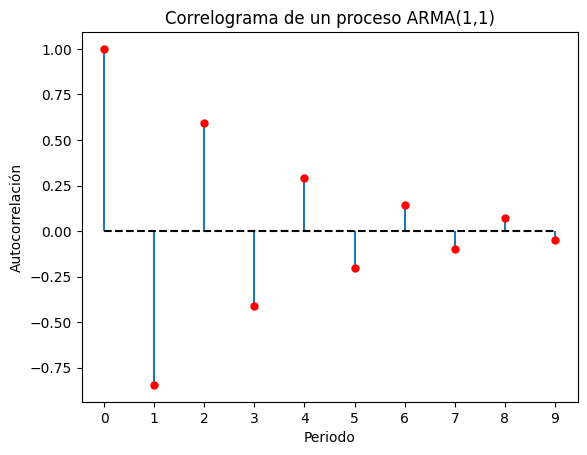

In [17]:

a1 = -0.7
b1 = -0.7
r = [1, ((1+a1*b1)*(a1+b1))/(1+(b1**2)+2*a1*b1)]
for i in range(2,10):
    r.append(a1*r[i-1])
plt.vlines(x = range(0,10) ,ymin = 0, ymax = r)
plt.plot(r, "o", markersize = 5, color = "red")
plt.hlines(xmin=0, xmax = 9, y = 0, colors= "black", linestyle = "dashed")
plt.xticks(range(0,10))
plt.title("Correlograma de un proceso ARMA(1,1)")
plt.xlabel("Periodo")
plt.ylabel("Autocorrelación")
plt.show()

En general, un proceso $\text{ARMA}(p,q)$ tendrá las siguientes ecuaciones de Yule-Walker después del rezago $q$:
$$\rho_i = \sum_{j=1}^pa_j\rho_{i-j}$$
Las autocorrelaciones anteriores a este rezago se pueden tratar como condiciones iniciales.

### La función de autocorrelación parcial
Otra herramienta importante para la elección del modelo adecuado según la metodología de Box-Jenkins.

En un proceso $\text{AR}(1)$, $y_t$ y $y_{t-2}$ están correlacionados, aunque no de manera directa. Esto se debe a que $y_t$ y $y_{t-1}$ están correlacionados, pero $y_{t-1}$ y $y_{t-2}$ también están correlacionados. Así, estas *correlaciones indirectas* siempre están presentes en la función de autocorrelación de cualquier proceso autorregresivo.

La **autocorrelación parcial** entre $y_t$ y $y_{t-s}$, simbolizada como $\phi_{ss}$, controla todos estos efectos indirectos.

**Cálculo de la autocorrelación parcial**

Primero, se forma la serie $\{y_t^*\}$ restando la media de la serie original ($\mu$) con cada observación para obtener $y_t^* \equiv y_t - \mu$

Luego, se genera la siguiente regresión:
$$y_t^* = \phi_{11}y_{t-1}^*+e_t$$
El coeficiente $\phi_{11}$ será la autocorrelación parcial (y también la otra porque no hay otros términos). Nota: $e_t$ no tiene por qué ser ruido blanco.

Si se genera otra regresión, pero de orden 2:
$$y_t^* = \phi_{21}y_{t-1}^*+ \phi_{22}y_{t-2}^*+e_t$$
Ahora $\phi_{22}$ sería la autocorrelación parcial entre $y_t$ y $y_{t-2}$, ya que controla los efectos de $y_{t-1}$. Así, se puede obtener la $s$-ésima autocorrelación parcial (ya que estas regresiones controlan los efectos del resto de rezagos).

Como observación adicional, se debe observar que es posible obtener las autocorrelaciones parciales utilizando un método recursivo basado en las ecuaciones de Yule-Walker.
$$\begin{align*}
\phi_{11} &= \rho_1\\
\phi_{22} &= \dfrac{(\rho_2-\rho_1^2)}{(1-\rho_1^2)}\\
\phi_{ss} &= \dfrac{\rho_s-\sum_{j=1}^{s-1}\phi_{s-1,j}\rho_{s-j}}{1-\sum_{j=1}^{s-1}\phi_{s-1,j}\rho_j}
\end{align*}$$
En donde $\phi_{sj} = \phi_{s-1,j}-\phi_{ss}\phi_{s-1,s-j}$ para todo $j = 1,2,3,\ldots,s-1$

Para un proceso $\text{AR}(p)$, no hay correlación directa entre $y_t$ y $y_{t-s}$ para $s>p$. Entonces,después de $p$ rezagos, la PACF tiene un corte y es igual a cero.

Por otro lado, para un proceso $\text{MA}(1)$, si se tiene que $y_t = \varepsilon_t + \beta_t\varepsilon_{t-1}$, podríamos reescribir el modelo utilizando polinomios de rezagos y luego invertirlo para hallar la representación $\text{AR}(\infty)$ siempre que $\beta \neq -1$

$$y_t - \beta y_{t-1} + \beta^2 y_{t-2} - \beta^3 y_{t-3} + \ldots = \varepsilon_t$$

Como se logra observar, no hay un corte hacia cero en este tipo de procesos para el PACF, sino un decaimiento exponencial. La autocorrelación parcial se comporta como los coeficientes del polinomio de rezago $\left(1+\beta L\right)^{-1}$.

Así, el PACF de un proceso estacionario $\text{ARMA}(p,q)$ va a tender a cero después del rezago $p$, pues la parte $\text{AR}(p)$ dejará de molestar ya que su autocorrelación tomará un valor igual a cero. Como se observó para el proceso $\text{MA}(1)$, el patrón de decaimiento será explicado por los coeficientes del polinomio $\left(1+\beta_1 L +\beta_2 L^2 + \ldots + +\beta_q L^q\right)^{-1}$.

## Práctica

In [3]:
df = pd.read_csv("../Data/quarterly(2012).csv", sep = ";")
df.DATE = pd.to_datetime(df.DATE).dt.to_period("Q")

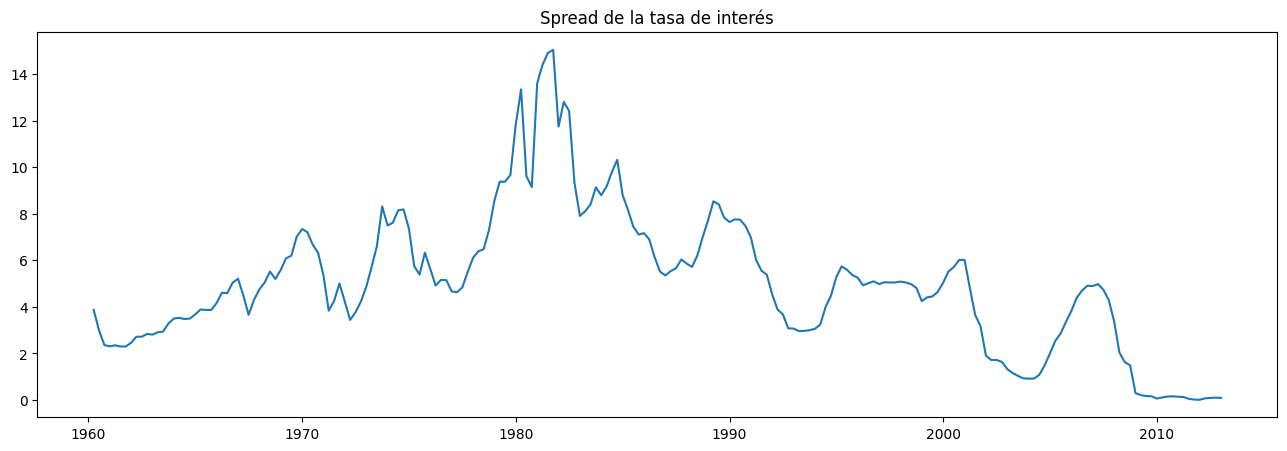

In [4]:
plt.figure(figsize=(16, 5))
plt.title("Spread de la tasa de interés")
plt.plot_date(df['DATE'],df['Tb3mo'],"-")
plt.show()